In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [341]:
wine_df = pd.read_csv("wine-clustering.csv")
print(wine_df.head())
13.16, 2.36, 2.67, 18.6, 101, 2.8 ,3.24 ,0.3 ,2.81 ,5.68 ,1.03 ,3.17 ,1185

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

(13.16, 2.36, 2.67, 18.6, 101, 2.8, 3.24, 0.3, 2.81, 5.68, 1.03, 3.17, 1185)

### EDA

In [342]:
wine_df.info()
wine_df.dtypes
wine_df["Magnesium"] = wine_df["Magnesium"].astype("float")
wine_df["Proline"] = wine_df["Proline"].astype("float")
wine_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium               float64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                 float64
dtype: object

In [343]:
### Addressing missing data
(wine_df.isnull() | wine_df.empty | wine_df.isna()).sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [344]:
wine_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


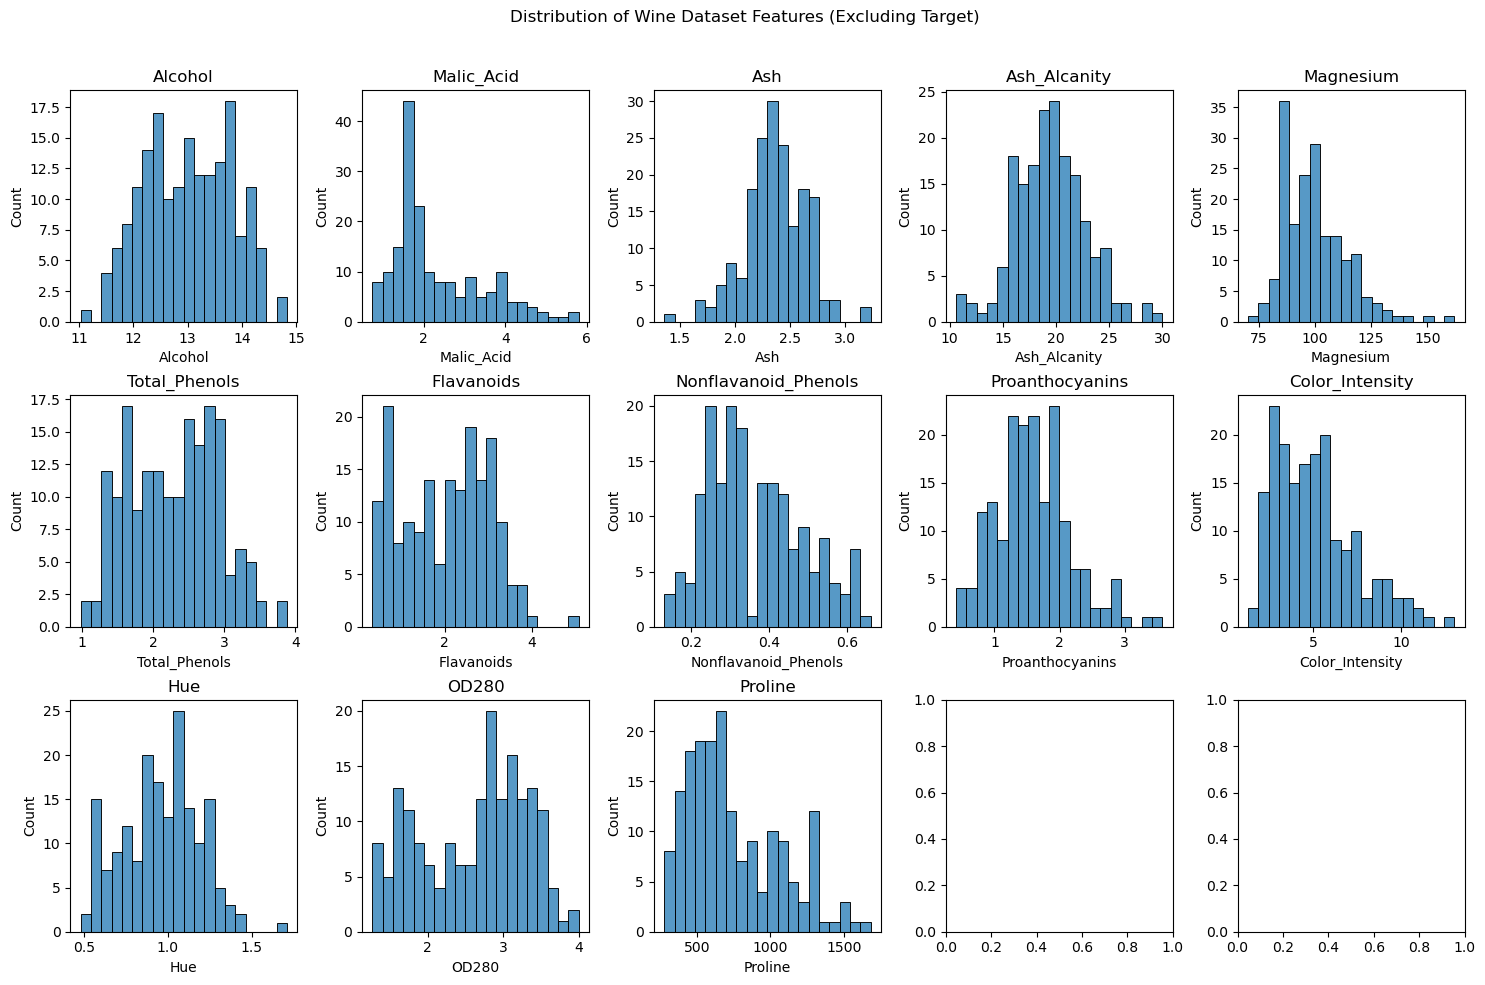

In [345]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(wine_df.columns):
    sns.histplot(wine_df[column], bins=20, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.suptitle('Distribution of Wine Dataset Features (Excluding Target)')
plt.subplots_adjust(top=0.9)

plt.show()

In [346]:
def filter_outliers_iqr(df, threshold=1.5):
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    outliers = ((df < lower_bound) | (df > upper_bound))
    
    return df.where(outliers, np.nan)




filtered_df = filter_outliers_iqr(wine_df)


print(filtered_df.notna().sum())


Alcohol                 0
Malic_Acid              3
Ash                     3
Ash_Alcanity            4
Magnesium               4
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         2
Color_Intensity         4
Hue                     1
OD280                   0
Proline                 0
dtype: int64


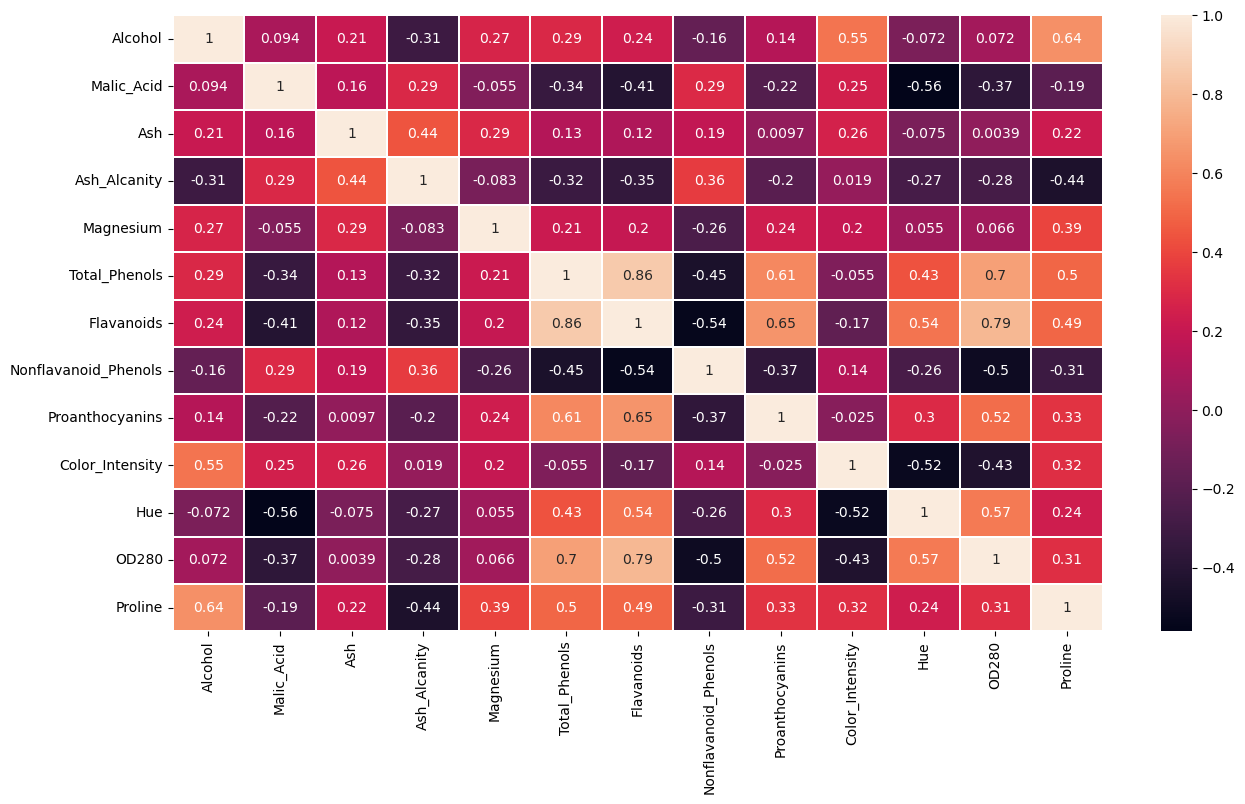

In [347]:
plt.figure(figsize=(15,8))
sns.heatmap(wine_df.corr(),annot = True,linewidths= .1)

plt.show()

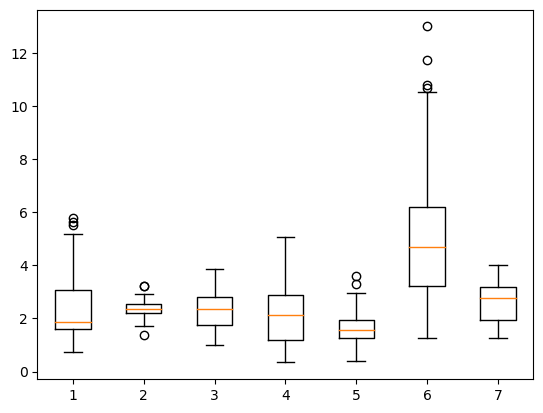

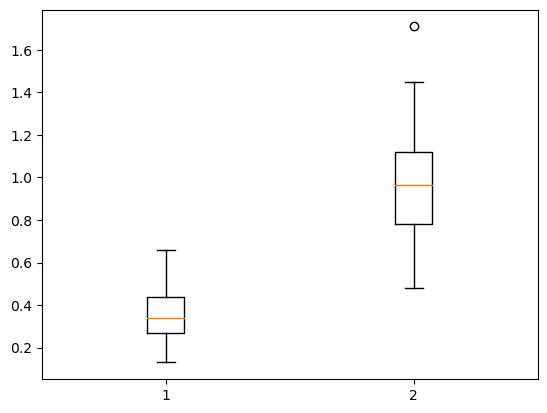

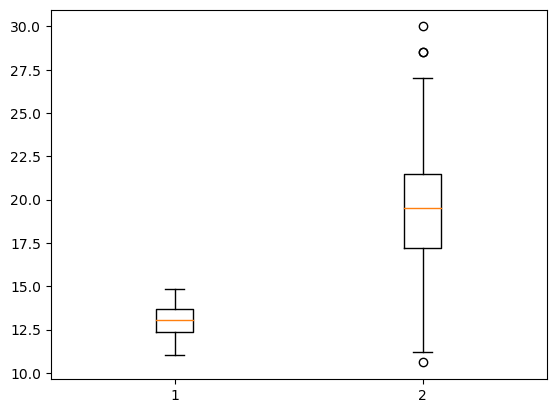

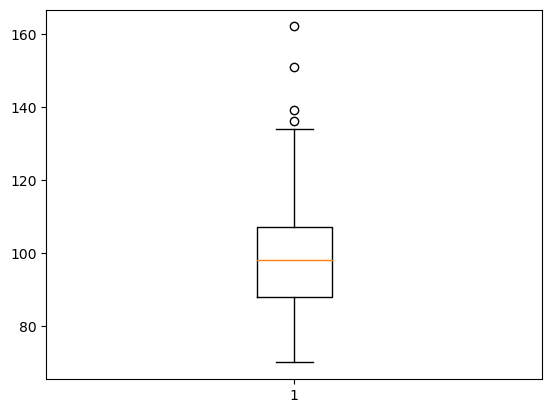

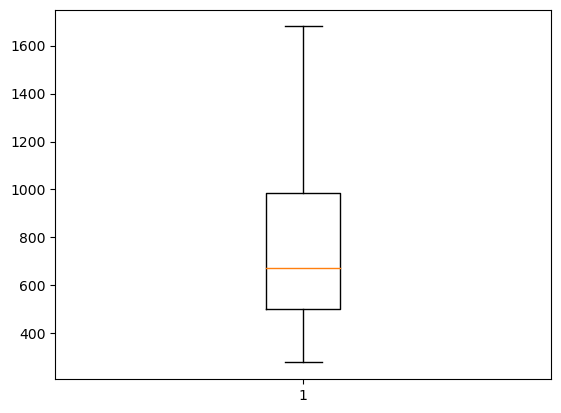

In [348]:
plt.boxplot(wine_df[["Malic_Acid","Ash","Total_Phenols","Flavanoids","Proanthocyanins","Color_Intensity","OD280"]])
plt.show()
plt.clf()
plt.boxplot(wine_df[["Nonflavanoid_Phenols","Hue"]])
plt.show()
plt.boxplot(wine_df[["Alcohol","Ash_Alcanity"]])
plt.show()
plt.boxplot(wine_df[["Magnesium"]])
plt.show()
plt.boxplot(wine_df["Proline"])
plt.show()

#### Elbow method for deciding number of cluster centers for K-means


In [349]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


In [350]:
len(wine_df.columns)
num_slices = 4

# Create a list of DataFrames, each containing 3 columns
slices = [wine_df.iloc[:, i*3:(i+1)*3] for i in range(num_slices)]
#last slice is for ground truth of DBSCAN
slices.append(wine_df[["Alcohol", "Magnesium" , "Color_Intensity"]])

In [351]:
print(slices)

[     Alcohol  Malic_Acid   Ash
0      14.23        1.71  2.43
1      13.20        1.78  2.14
2      13.16        2.36  2.67
3      14.37        1.95  2.50
4      13.24        2.59  2.87
..       ...         ...   ...
173    13.71        5.65  2.45
174    13.40        3.91  2.48
175    13.27        4.28  2.26
176    13.17        2.59  2.37
177    14.13        4.10  2.74

[178 rows x 3 columns],      Ash_Alcanity  Magnesium  Total_Phenols
0            15.6      127.0           2.80
1            11.2      100.0           2.65
2            18.6      101.0           2.80
3            16.8      113.0           3.85
4            21.0      118.0           2.80
..            ...        ...            ...
173          20.5       95.0           1.68
174          23.0      102.0           1.80
175          20.0      120.0           1.59
176          20.0      120.0           1.65
177          24.5       96.0           2.05

[178 rows x 3 columns],      Flavanoids  Nonflavanoid_Phenols  Proanthocy

In [352]:
map1_arr = []
map2_arr = []
K = range(1,10)
for slice in slices:
    map1 = {}
    map2 = {}
    distortion = []
    inertia = []
    for k in K:
        kmeanModel = KMeans(n_clusters = k, n_init=10).fit(slice)
        kmeanModel.fit(slice)
        distortion.append(sum(np.min(cdist(slice,kmeanModel.cluster_centers_,'euclidean'),axis = 1))/slice.shape[0])
        inertia.append(kmeanModel.inertia_) 
        map1[k] = sum(np.min(cdist(slice,kmeanModel.cluster_centers_,'euclidean'),axis = 1))/slice.shape[0]
        map2[k] = kmeanModel.inertia_
    for key,val in map1.items():
        print(f'{key}   : {val}')
    map1_arr.append(map1)
    map2_arr.append(map2)

print(map1_arr)

print(map2_arr)

d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

1   : 1.2852287242451041
2   : 0.9282192521768211
3   : 0.6844271187280627
4   : 0.6152615257678282
5   : 0.575728630584409
6   : 0.5372981516993203
7   : 0.5084131811012277
8   : 0.47302816210874854
9   : 0.45665951989639186


d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

1   : 11.789580193346369
2   : 7.7997338214460585
3   : 5.830746651029443
4   : 5.061658748004418
5   : 4.472076559003717
6   : 4.122635186661049
7   : 3.791051565891857
8   : 3.5428612437237788
9   : 3.2855415468482136


d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

1   : 1.0321281088418326
2   : 0.6081543570197938
3   : 0.48564828696391393
4   : 0.42101570448754133
5   : 0.394612453637243
6   : 0.3718603411239022
7   : 0.34928727955632805
8   : 0.33080099088003684
9   : 0.30042227822220374


d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

1   : 2.0521650921029333
2   : 1.3584798863466505
3   : 0.9676669537267766
4   : 0.8611322834579035
5   : 0.7635894079224936
6   : 0.6814396075947942
7   : 0.616098106117903
8   : 0.5930001681830106
9   : 0.5524562373749045


d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\envs\base-data\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

1   : 11.40990129600773
2   : 7.396999854804012
3   : 5.3861231709430575
4   : 4.480813397049409
5   : 3.8314738369962567
6   : 3.5242647299966046
7   : 3.187536152277945
8   : 2.905035443866488
9   : 2.6451630694794765
[{1: 1.2852287242451041, 2: 0.9282192521768211, 3: 0.6844271187280627, 4: 0.6152615257678282, 5: 0.575728630584409, 6: 0.5372981516993203, 7: 0.5084131811012277, 8: 0.47302816210874854, 9: 0.45665951989639186}, {1: 11.789580193346369, 2: 7.7997338214460585, 3: 5.830746651029443, 4: 5.061658748004418, 5: 4.472076559003717, 6: 4.122635186661049, 7: 3.791051565891857, 8: 3.5428612437237788, 9: 3.2855415468482136}, {1: 1.0321281088418326, 2: 0.6081543570197938, 3: 0.48564828696391393, 4: 0.42101570448754133, 5: 0.394612453637243, 6: 0.3718603411239022, 7: 0.34928727955632805, 8: 0.33080099088003684, 9: 0.30042227822220374}, {1: 2.0521650921029333, 2: 1.3584798863466505, 3: 0.9676669537267766, 4: 0.8611322834579035, 5: 0.7635894079224936, 6: 0.6814396075947942, 7: 0.61609810

In [353]:
for maps in map1_arr:
    vals = np.array(maps.values())
    print(vals)

dict_values([1.2852287242451041, 0.9282192521768211, 0.6844271187280627, 0.6152615257678282, 0.575728630584409, 0.5372981516993203, 0.5084131811012277, 0.47302816210874854, 0.45665951989639186])
dict_values([11.789580193346369, 7.7997338214460585, 5.830746651029443, 5.061658748004418, 4.472076559003717, 4.122635186661049, 3.791051565891857, 3.5428612437237788, 3.2855415468482136])
dict_values([1.0321281088418326, 0.6081543570197938, 0.48564828696391393, 0.42101570448754133, 0.394612453637243, 0.3718603411239022, 0.34928727955632805, 0.33080099088003684, 0.30042227822220374])
dict_values([2.0521650921029333, 1.3584798863466505, 0.9676669537267766, 0.8611322834579035, 0.7635894079224936, 0.6814396075947942, 0.616098106117903, 0.5930001681830106, 0.5524562373749045])
dict_values([11.40990129600773, 7.396999854804012, 5.3861231709430575, 4.480813397049409, 3.8314738369962567, 3.5242647299966046, 3.187536152277945, 2.905035443866488, 2.6451630694794765])


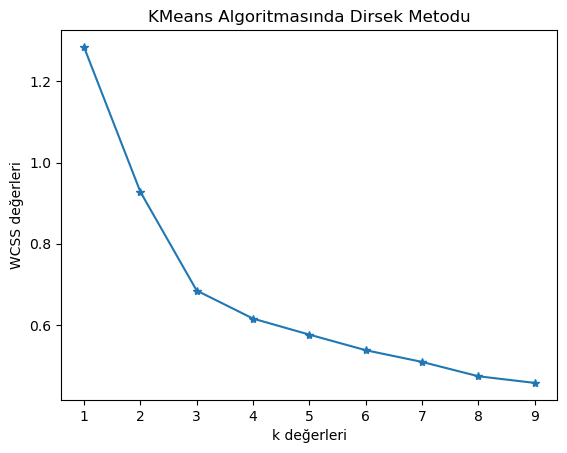

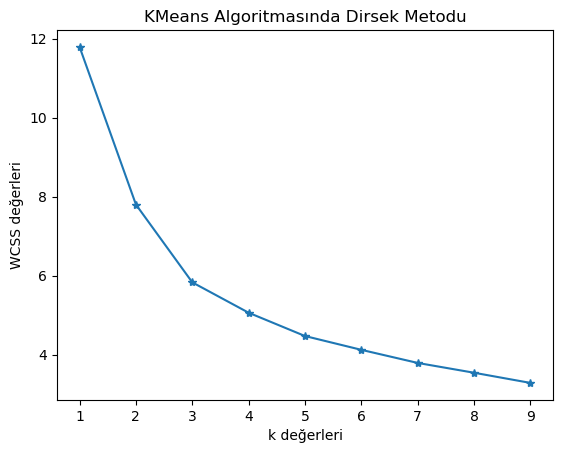

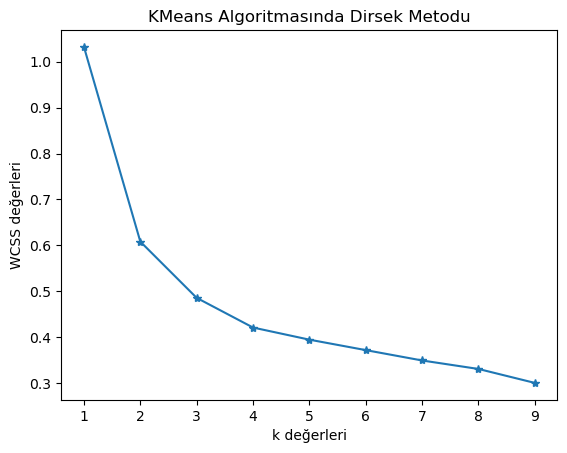

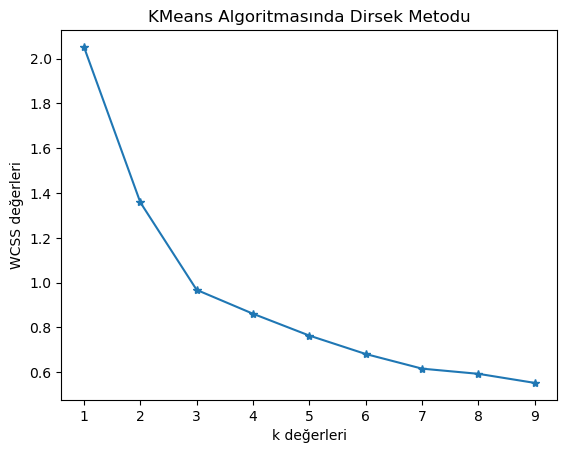

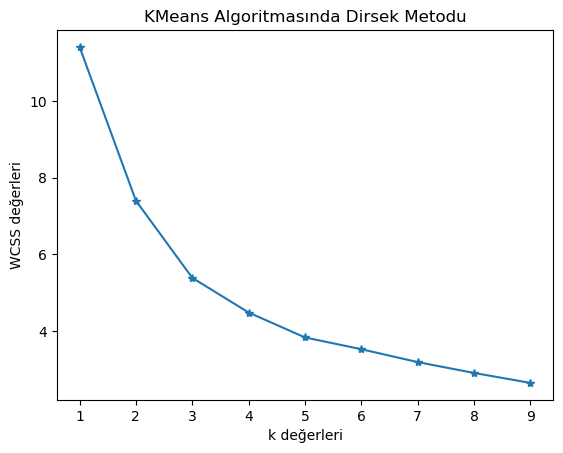

In [354]:
for maps in map1_arr:
    vals = list(maps.values())
    plt.plot(K,vals,'*',linestyle="-")
    plt.xlabel('k değerleri')
    plt.ylabel('WCSS değerleri')
    plt.xticks(K)
    plt.title('KMeans Algoritmasında Dirsek Metodu')
    
    
    """ wcss_diff = [vals[i] - vals[i - 1] for i in range(1, len(vals))]
    print(f"wcss_dfii {wcss_diff}")
    # Find the index of the elbow point
    elbow_index = wcss_diff.index(max(wcss_diff)) + 1  # Adding 1 to account for the zero-based index
    print(f"elbow_index  {elbow_index}")
    # Highlight the elbow point
    plt.scatter(K[elbow_index], vals[elbow_index], c='red', marker='o', label=f'Elbow (k={K[elbow_index]})')
    """
    plt.show()

In [361]:
K_vals = [4,3,4,3,5]

### Scatter visualization of slices data points

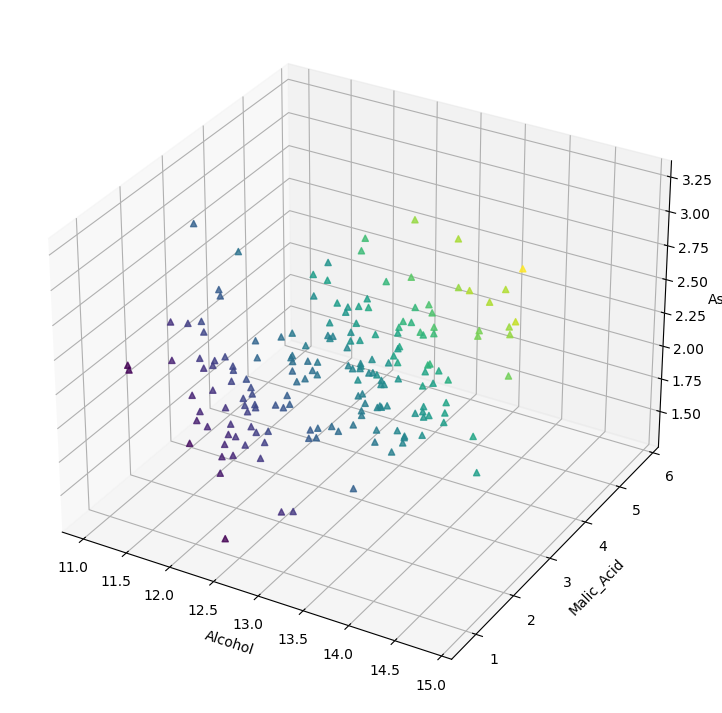

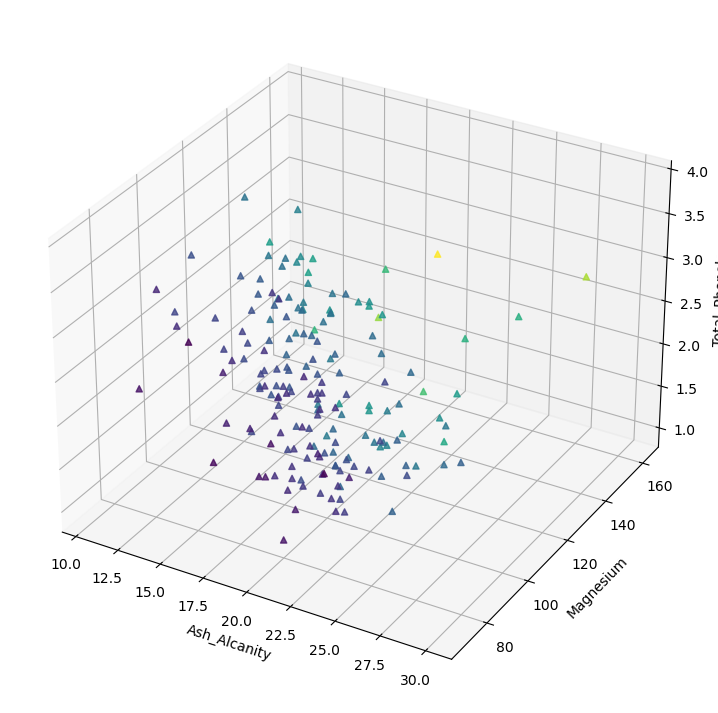

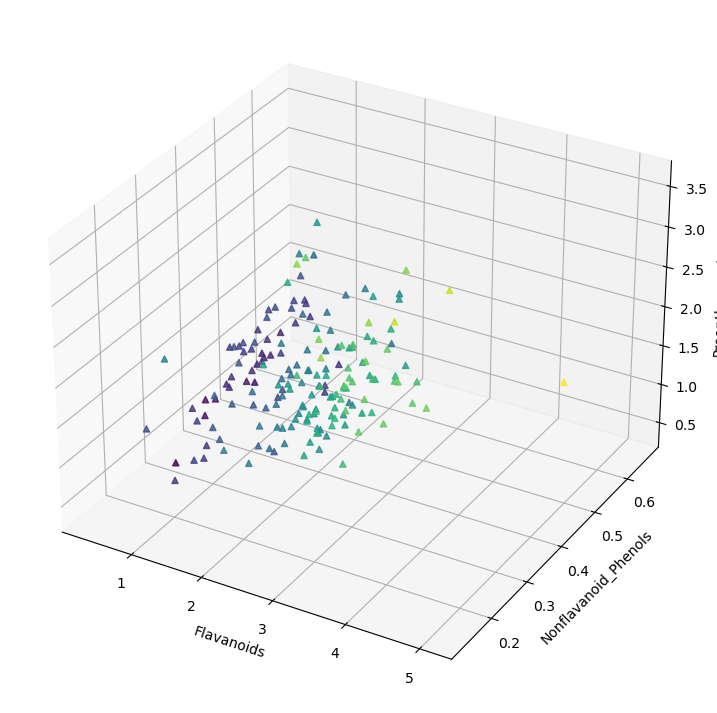

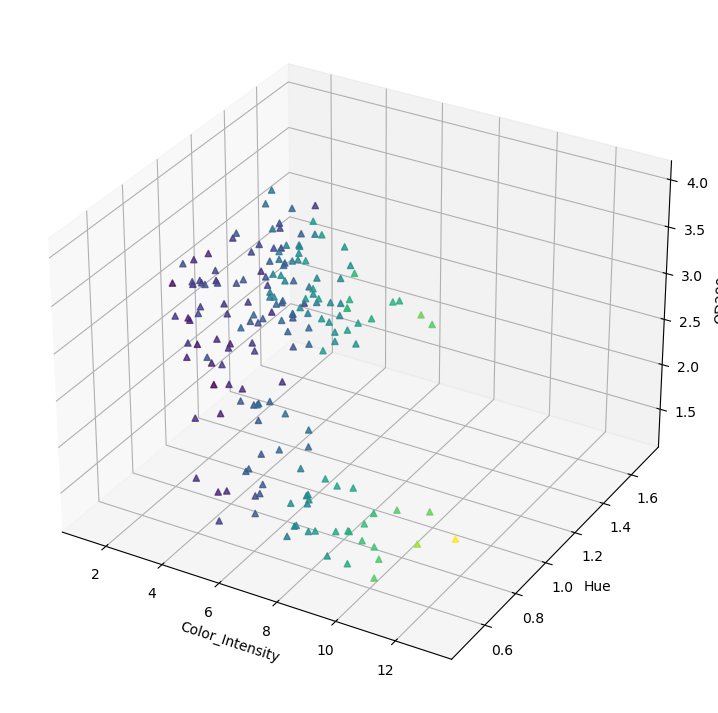

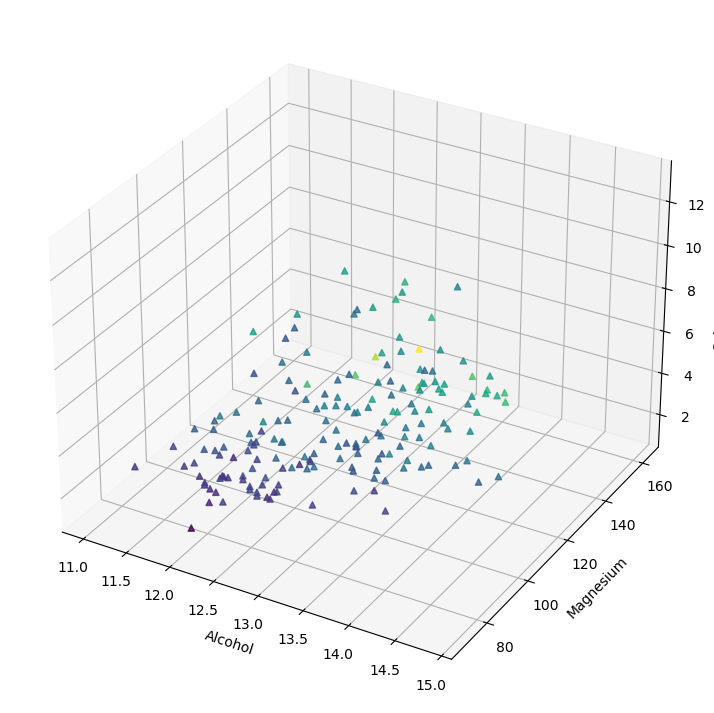

In [362]:
for slice in slices:
        fig = plt.figure(figsize=(16,9))
        
        
        ax = plt.axes(projection ="3d")
        ax.grid(b = True, color ='grey', 
                linestyle ='-.', linewidth = 0.3, 
                alpha = 0.2) 
        x,y,z = slice.iloc[:,0],slice.iloc[:,1],slice.iloc[:,2]
        
        sctt = ax.scatter3D(x, y, z,
                        alpha = 0.8,
                        c = (x + y + z), 
                        
                        marker ='^')
        
        ax.set_xlabel(slice.columns[0])
        ax.set_ylabel(slice.columns[1])
        ax.set_zlabel(slice.columns[2])

In [363]:
print(zip(K_vals,slices))
for k,slice in zip(K_vals,slices):
    print(k,slice.columns) 

4 Index(['Alcohol', 'Malic_Acid', 'Ash'], dtype='object')
3 Index(['Ash_Alcanity', 'Magnesium', 'Total_Phenols'], dtype='object')
4 Index(['Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins'], dtype='object')
3 Index(['Color_Intensity', 'Hue', 'OD280'], dtype='object')
5 Index(['Alcohol', 'Magnesium', 'Color_Intensity'], dtype='object')


In [364]:
np.random.seed(23)
clusters_array = []
for k,slice in zip(K_vals,slices):
    clusters = {}
    for idx in range(k):
        merkez = (2* slice.sample(n=1).values[0]-1) / 2
        noktalar = []
        cluster = {
            'merkezler' : merkez,
            'noktalar' : [],
        }
        clusters[idx] = cluster
    clusters_array.append(clusters)
clusters_array

[{0: {'merkezler': array([12.35,  2.77,  2.08]), 'noktalar': []},
  1: {'merkezler': array([11.34,  0.39,  2.08]), 'noktalar': []},
  2: {'merkezler': array([13.23,  1.  ,  2.2 ]), 'noktalar': []},
  3: {'merkezler': array([11.87,  1.13,  1.8 ]), 'noktalar': []}},
 {0: {'merkezler': array([17.5 , 87.5 ,  2.35]), 'noktalar': []},
  1: {'merkezler': array([20.5 , 81.5 ,  2.36]), 'noktalar': []},
  2: {'merkezler': array([22. , 88.5,  2.1]), 'noktalar': []}},
 {0: {'merkezler': array([ 3.04, -0.18,  1.58]), 'noktalar': []},
  1: {'merkezler': array([ 2.5 , -0.22,  1.53]), 'noktalar': []},
  2: {'merkezler': array([ 0.86, -0.26,  0.76]), 'noktalar': []},
  3: {'merkezler': array([ 0.2 , -0.06,  0.74]), 'noktalar': []}},
 {0: {'merkezler': array([1.24, 0.57, 2.71]), 'noktalar': []},
  1: {'merkezler': array([2.85, 0.81, 3.  ]), 'noktalar': []},
  2: {'merkezler': array([6.3 , 0.39, 2.37]), 'noktalar': []}},
 {0: {'merkezler': array([ 11.75, 111.5 ,   7.71]), 'noktalar': []},
  1: {'merkezle

In [365]:
for clusters in clusters_array:
                for cluster in clusters.values():
                        merkezler_array = cluster['merkezler']
                        print(merkezler_array)

[12.35  2.77  2.08]
[11.34  0.39  2.08]
[13.23  1.    2.2 ]
[11.87  1.13  1.8 ]
[17.5  87.5   2.35]
[20.5  81.5   2.36]
[22.  88.5  2.1]
[ 3.04 -0.18  1.58]
[ 2.5  -0.22  1.53]
[ 0.86 -0.26  0.76]
[ 0.2  -0.06  0.74]
[1.24 0.57 2.71]
[2.85 0.81 3.  ]
[6.3  0.39 2.37]
[ 11.75 111.5    7.71]
[12.8  93.5   3.45]
[13.63 95.5   8.7 ]
[12.1  87.5   1.95]
[10.91 87.5   2.58]


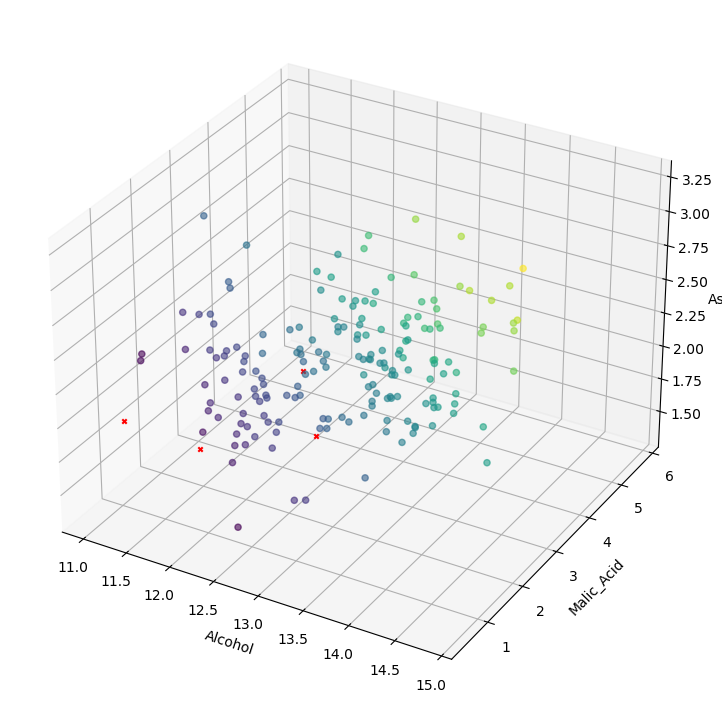

<Figure size 640x480 with 0 Axes>

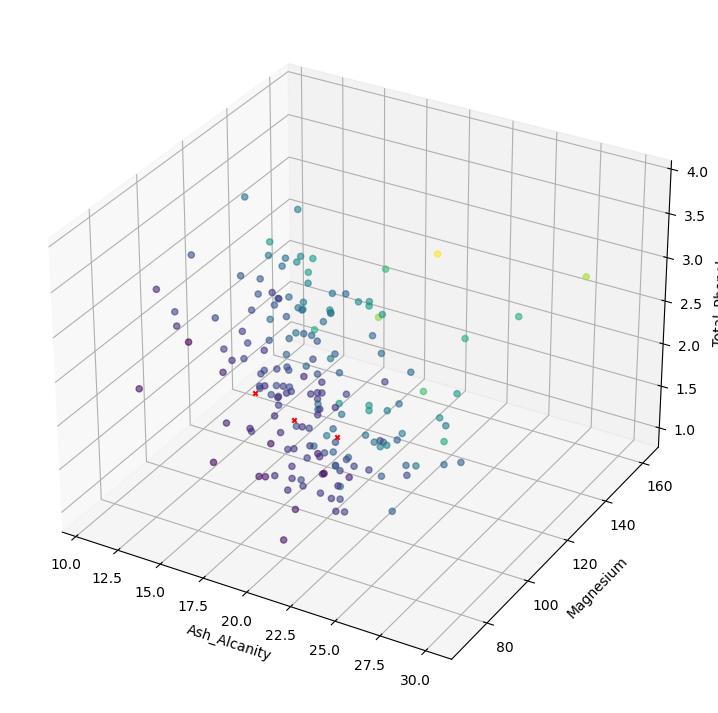

<Figure size 640x480 with 0 Axes>

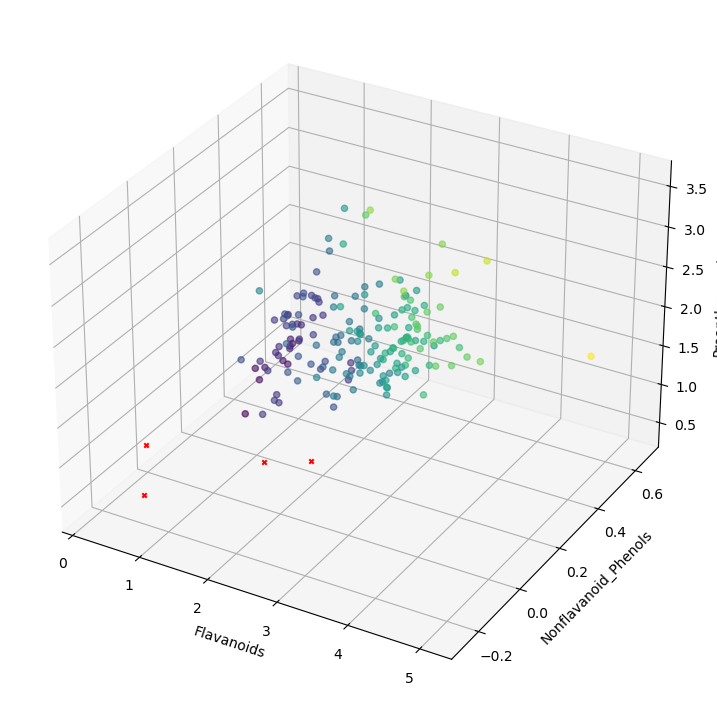

<Figure size 640x480 with 0 Axes>

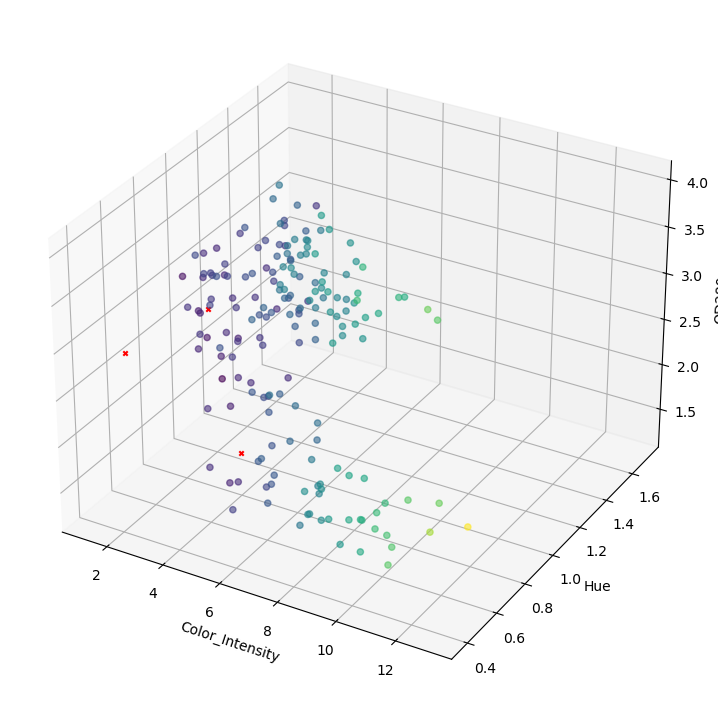

<Figure size 640x480 with 0 Axes>

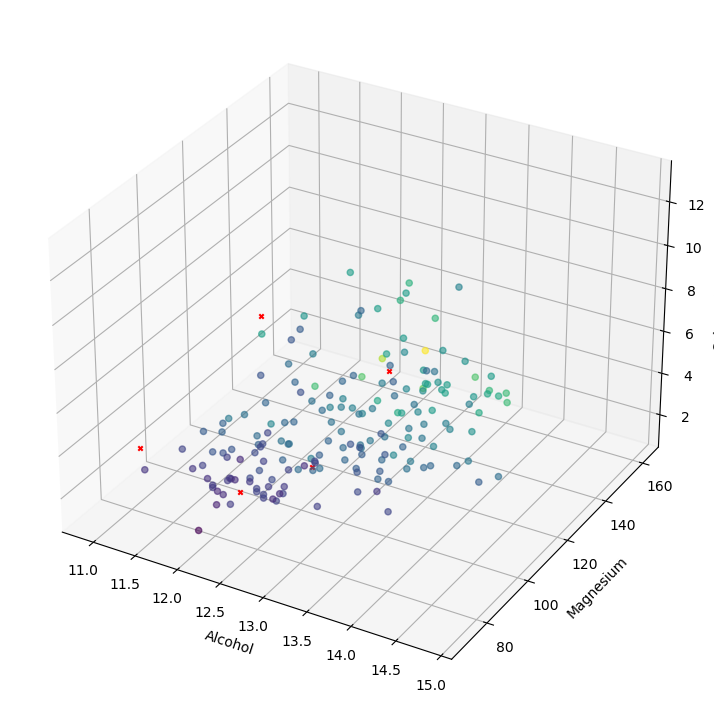

<Figure size 640x480 with 0 Axes>

In [366]:
for i,slice in zip(range(len(slices)),slices):
        fig = plt.figure(figsize=(16,9))
        ax = plt.axes(projection ="3d")
        ax.grid(b = True, color ='grey', 
                linestyle ='-.', linewidth = 0.3, 
                alpha = 0.2) 
        x,y,z = slice.iloc[:,0],slice.iloc[:,1],slice.iloc[:,2]
        
        sctt = ax.scatter3D(x, y, z,
                        alpha = 0.6,
                        c = (x + y + z), 
                        marker ='o')
        ax.set_xlabel(slice.columns[0])
        ax.set_ylabel(slice.columns[1])
        ax.set_zlabel(slice.columns[2])
        
        
        
        for cluster in clusters_array[i].values():
                #print(len(clusters_array[i]))
                #print(f".... {cluster['merkezler']}")
                merkez = cluster['merkezler']
                ax.scatter3D(merkez[0],merkez[1],merkez[2],marker = "x", c='red',s=10)
                       
        plt.show()
        plt.clf()
        

In [367]:
def mesafe(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

### Küme Merkezlerini Atama ve Güncelleme

In [368]:
print(clusters_array)

[{0: {'merkezler': array([12.35,  2.77,  2.08]), 'noktalar': []}, 1: {'merkezler': array([11.34,  0.39,  2.08]), 'noktalar': []}, 2: {'merkezler': array([13.23,  1.  ,  2.2 ]), 'noktalar': []}, 3: {'merkezler': array([11.87,  1.13,  1.8 ]), 'noktalar': []}}, {0: {'merkezler': array([17.5 , 87.5 ,  2.35]), 'noktalar': []}, 1: {'merkezler': array([20.5 , 81.5 ,  2.36]), 'noktalar': []}, 2: {'merkezler': array([22. , 88.5,  2.1]), 'noktalar': []}}, {0: {'merkezler': array([ 3.04, -0.18,  1.58]), 'noktalar': []}, 1: {'merkezler': array([ 2.5 , -0.22,  1.53]), 'noktalar': []}, 2: {'merkezler': array([ 0.86, -0.26,  0.76]), 'noktalar': []}, 3: {'merkezler': array([ 0.2 , -0.06,  0.74]), 'noktalar': []}}, {0: {'merkezler': array([1.24, 0.57, 2.71]), 'noktalar': []}, 1: {'merkezler': array([2.85, 0.81, 3.  ]), 'noktalar': []}, 2: {'merkezler': array([6.3 , 0.39, 2.37]), 'noktalar': []}}, {0: {'merkezler': array([ 11.75, 111.5 ,   7.71]), 'noktalar': []}, 1: {'merkezler': array([12.8 , 93.5 ,  

In [370]:
def merkez_atama(slice,clusters,k):
    cluster = clusters
    for idx in range(slice.shape[0]):
        msf = []
        curr_point = np.array(slice.iloc[[idx]])

        for i in range(k):
            ms = mesafe(curr_point, cluster[i]['merkezler'])
            msf.append(ms)

        ykn_mesafe = np.argmin(msf)
        cluster[ykn_mesafe]['noktalar'].append(curr_point)
    return cluster

def merkez_guncelleme(slice,clusters,k):
    cluster = clusters
    for i in range(k):
        noktalar = np.array(cluster[i]['noktalar'])
        if noktalar.shape[0]>0:
            yeni_merkez = noktalar.mean(axis=0)
            cluster[i]['merkezler'] = yeni_merkez
            cluster[i]['noktalar'] = []
    return cluster


### Küme tahmin etme

In [371]:
def tahmin_kumeleme(slice,clusters,k):
    cluster = clusters
    tahmin = []
    for i in range(slice.shape[0]):
        msf = []
        for j in range(k):
            msf.append(mesafe(np.array((slice.iloc[[i]])),cluster[j]['merkezler']))
            
        tahmin.append(np.argmin(msf))

    return tahmin

In [ ]:
"""slice0 = slices[2]
cluster0 = clusters_array[2]
k0 = K_vals[2]
cluster0 =  merkez_atama(slice0,cluster0,k0)
cluster0 = merkez_guncelleme(slice0,cluster0,k0)
tahmin= tahmin_kumeleme(slice0,cluster0,k0)
print(cluster0)
print(tahmin)"""


'slice0 = slices[2]\ncluster0 = clusters_array[2]\nk0 = K_vals[2]\ncluster0 =  merkez_atama(slice0,cluster0,k0)\ncluster0 = merkez_guncelleme(slice0,cluster0,k0)\ntahmin= tahmin_kumeleme(slice0,cluster0,k0)\nprint(cluster0)\nprint(tahmin)'

### Uygulama


In [372]:
print(clusters_array)

[{0: {'merkezler': array([12.35,  2.77,  2.08]), 'noktalar': []}, 1: {'merkezler': array([11.34,  0.39,  2.08]), 'noktalar': []}, 2: {'merkezler': array([13.23,  1.  ,  2.2 ]), 'noktalar': []}, 3: {'merkezler': array([11.87,  1.13,  1.8 ]), 'noktalar': []}}, {0: {'merkezler': array([17.5 , 87.5 ,  2.35]), 'noktalar': []}, 1: {'merkezler': array([20.5 , 81.5 ,  2.36]), 'noktalar': []}, 2: {'merkezler': array([22. , 88.5,  2.1]), 'noktalar': []}}, {0: {'merkezler': array([ 3.04, -0.18,  1.58]), 'noktalar': []}, 1: {'merkezler': array([ 2.5 , -0.22,  1.53]), 'noktalar': []}, 2: {'merkezler': array([ 0.86, -0.26,  0.76]), 'noktalar': []}, 3: {'merkezler': array([ 0.2 , -0.06,  0.74]), 'noktalar': []}}, {0: {'merkezler': array([1.24, 0.57, 2.71]), 'noktalar': []}, 1: {'merkezler': array([2.85, 0.81, 3.  ]), 'noktalar': []}, 2: {'merkezler': array([6.3 , 0.39, 2.37]), 'noktalar': []}}, {0: {'merkezler': array([ 11.75, 111.5 ,   7.71]), 'noktalar': []}, 1: {'merkezler': array([12.8 , 93.5 ,  

In [380]:
tahmin_array = []
for slice,cluster,k,i in zip(slices,clusters_array,K_vals,range(len(K_vals))):
    
    clusters_array[i] = merkez_atama(slice,cluster,k)
    clusters_array[i] = merkez_guncelleme(slice,cluster,k)
    tahmin_array.append(tahmin_kumeleme(slice,cluster,k))

    

In [390]:
print(clusters_array)
print(tahmin_array)
ground_truth_cluster, ground_truth_tahmin = clusters_array[4],tahmin_array[4]

[{0: {'merkezler': array([[12.976     ,  3.68033333,  2.39816667]]), 'noktalar': []}, 1: {'merkezler': array([[11.4725,  1.1225,  2.495 ]]), 'noktalar': []}, 2: {'merkezler': array([[13.70384615,  1.78015385,  2.44553846]]), 'noktalar': []}, 3: {'merkezler': array([[12.22265306,  1.52755102,  2.21244898]]), 'noktalar': []}}, {0: {'merkezler': array([[18.80169492, 93.05084746,  2.22847458]]), 'noktalar': []}, 1: {'merkezler': array([[20.725     , 83.69444444,  2.05666667]]), 'noktalar': []}, 2: {'merkezler': array([[ 19.45421687, 111.45783133,   2.44590361]]), 'noktalar': []}}, {0: {'merkezler': array([[3.13578947, 0.29017544, 2.11684211]]), 'noktalar': []}, 1: {'merkezler': array([[2.17607143, 0.34535714, 1.60553571]]), 'noktalar': []}, 2: {'merkezler': array([[1.22941176, 0.38529412, 1.25088235]]), 'noktalar': []}, 3: {'merkezler': array([[0.60677419, 0.49774194, 0.97032258]]), 'noktalar': []}}, {0: {'merkezler': array([[2.11611111, 1.11555556, 2.77166667]]), 'noktalar': []}, 1: {'mer

C:\Users\gshaz\AppData\Local\Temp\ipykernel_18312\1089872962.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("tab10")


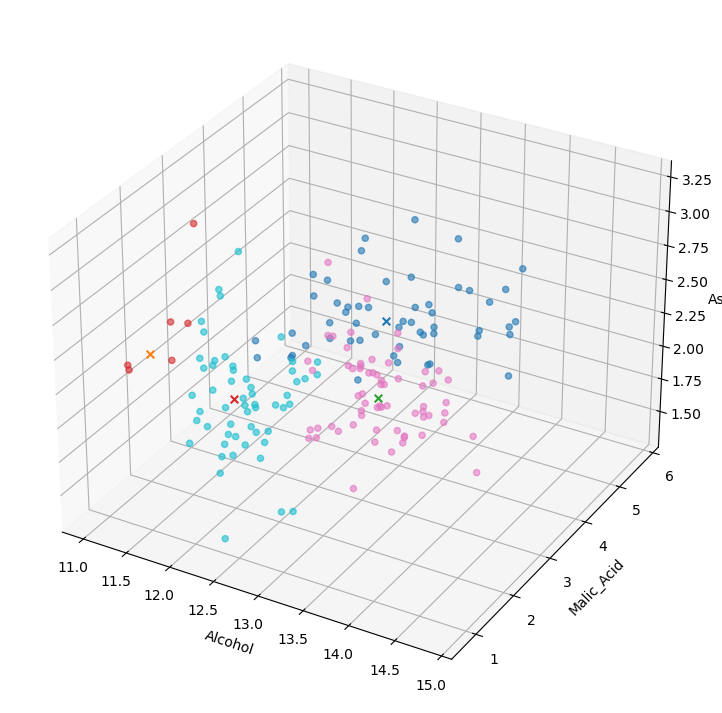

<Figure size 640x480 with 0 Axes>

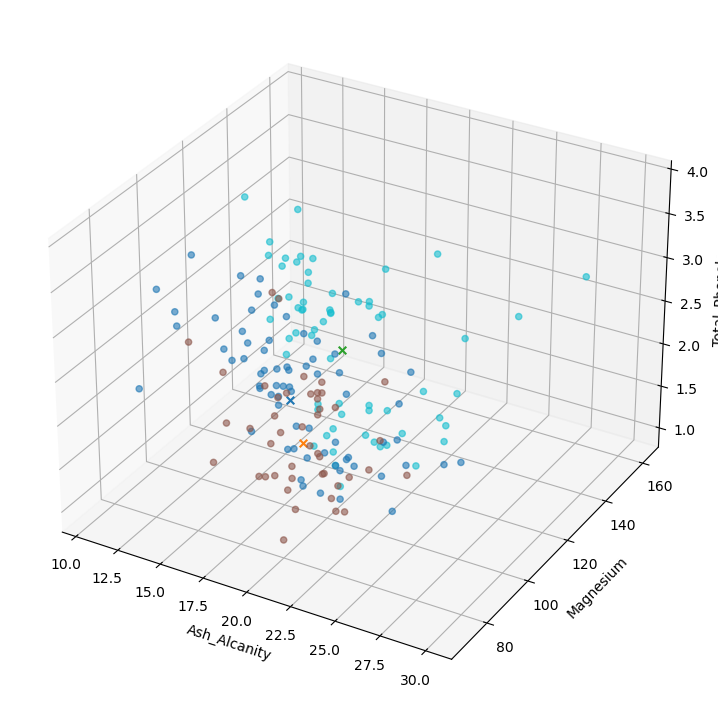

<Figure size 640x480 with 0 Axes>

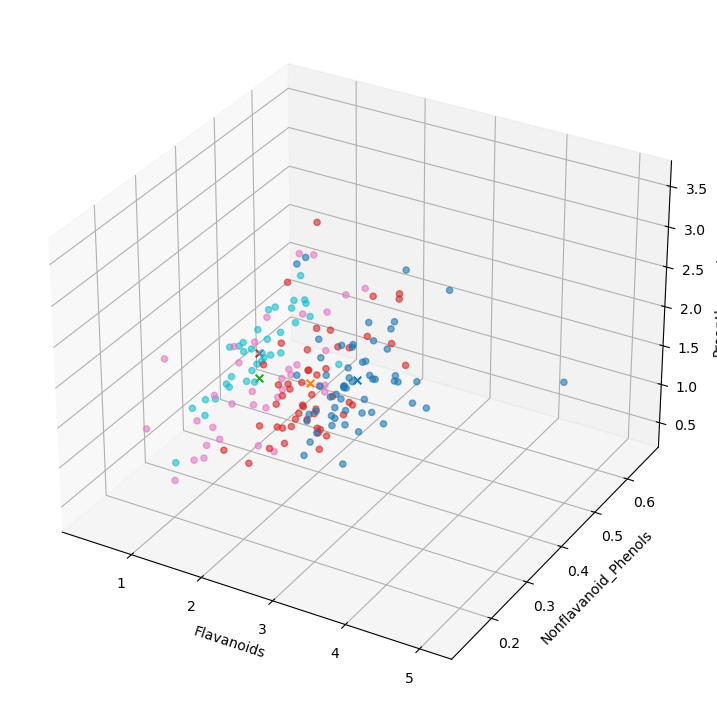

<Figure size 640x480 with 0 Axes>

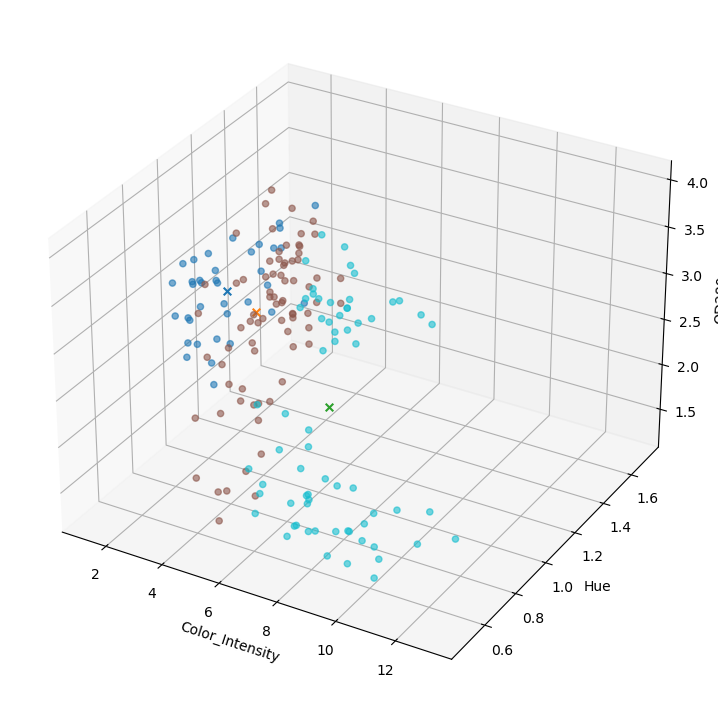

<Figure size 640x480 with 0 Axes>

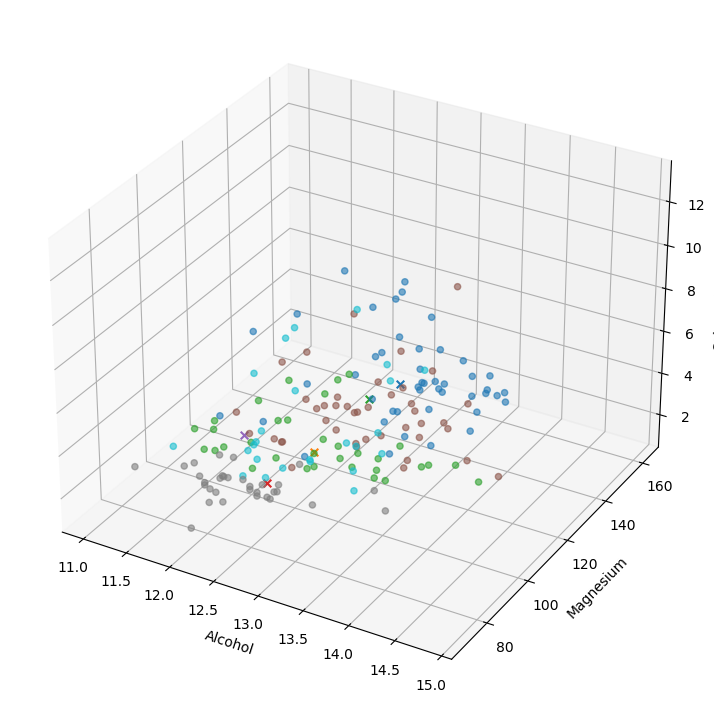

<Figure size 640x480 with 0 Axes>

In [382]:
from matplotlib.colors import ListedColormap
from matplotlib.cm import get_cmap      


cmap = get_cmap("tab10")
for i,slice in zip(range(len(slices)),slices):
        
        fig = plt.figure(figsize=(16,9))
        ax = plt.axes(projection ="3d")
        ax.grid(b = True, color ='grey', 
                linestyle ='-.', linewidth = 0.3, 
                alpha = 0.2) 
        x,y,z = slice.iloc[:,0],slice.iloc[:,1],slice.iloc[:,2]
        
        sctt = ax.scatter3D(x, y, z,
                        alpha = 0.6,
                        c = tahmin_array[i], 
                        cmap=cmap,
                        marker ='o')
        ax.set_xlabel(slice.columns[0])
        ax.set_ylabel(slice.columns[1])
        ax.set_zlabel(slice.columns[2])
        
        cluster_colors = [cmap(j) for j in range(len(clusters_array[0]))]  
        for j,cluster in enumerate(clusters_array[i].values()):
                
                merkez = cluster['merkezler']                
                ax.scatter3D(merkez[0][0],merkez[0][1],merkez[0][2],marker = "x", color=cmap(j)  ,s=30)

        plt.show()
        plt.clf()
        

##  DBSCAN

In [377]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [378]:
slice = wine_df[['Alcohol','Magnesium','Color_Intensity']]


#### Scaling data for DBSCAN

In [379]:
scaler = StandardScaler()
scaled_slice = scaler.fit_transform(slice)
print(scaled_slice)

[[ 1.51861254e+00  1.91390522e+00  2.51716850e-01]
 [ 2.46289627e-01  1.81450206e-02 -2.93321329e-01]
 [ 1.96879028e-01  8.83583612e-02  2.69019649e-01]
 [ 1.69154964e+00  9.30918449e-01  1.18606801e+00]
 [ 2.95700226e-01  1.28198515e+00 -3.19275528e-01]
 [ 1.48155459e+00  8.60705108e-01  7.31869531e-01]
 [ 1.71625494e+00 -2.62708342e-01  8.30145565e-02]
 [ 1.30861750e+00  1.49262517e+00 -3.49944013e-03]
 [ 2.25977152e+00 -1.92495001e-01  6.13860573e-02]
 [ 1.06156450e+00 -1.22281661e-01  9.35177423e-01]
 [ 1.35802810e+00  3.69211724e-01  2.99299548e-01]
 [ 1.38273339e+00 -3.32921683e-01 -2.51279393e-02]
 [ 9.25685358e-01 -7.54201726e-01  2.34414051e-01]
 [ 2.16095032e+00 -6.13775045e-01  1.47900054e-01]
 [ 1.70390229e+00  1.58571702e-01  1.05629702e+00]
 [ 7.77453562e-01  8.60705108e-01  9.69783022e-01]
 [ 1.60508109e+00  1.42241183e+00  4.93956040e-01]
 [ 1.02450655e+00  1.07134513e+00  6.66984033e-01]
 [ 1.46920194e+00  5.79851746e-01  1.57538100e+00]
 [ 7.89806212e-01  1.14155847e+

In [455]:
db = DBSCAN(eps=.6, min_samples=10).fit(scaled_slice)
core_samples = np.zeros_like(db.labels_,dtype = bool)
core_samples[db.core_sample_indices_] = True
labels = db.labels_



In [456]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
uniq_labels = set(labels)
colors = ['y','b','g','r']
print(n_clusters)

4


### Plotting DBSCAN for columns Alcohol Magnesium and Color_Intensity

67


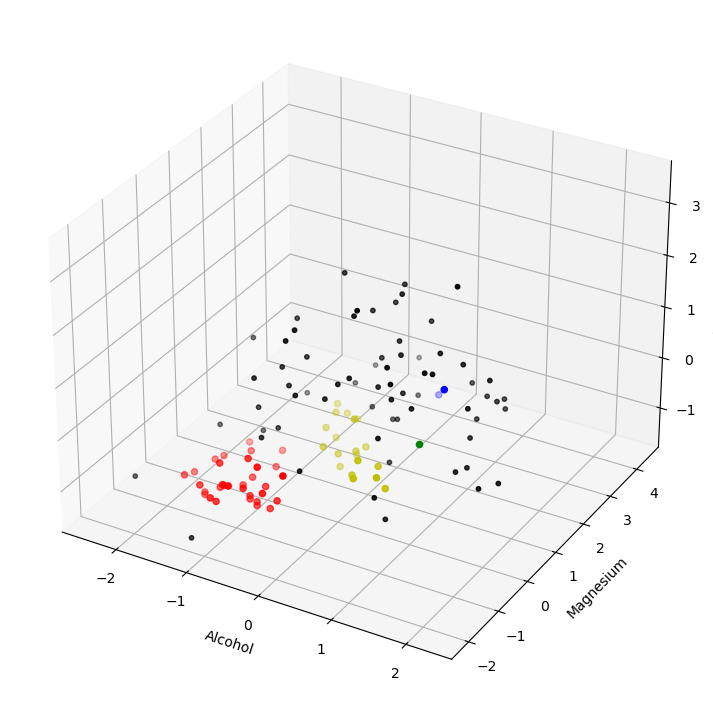

In [457]:
fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection ="3d")
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 

ax.set_xlabel('Alcohol')
ax.set_ylabel('Magnesium')
ax.set_zlabel('Color_Intensity')

for k, col in zip(uniq_labels,colors):
    class_member_ara = (labels == k)
    xyz = scaled_slice[class_member_ara & core_samples]
    ax.scatter3D(xyz[:,0],xyz[:,1],xyz[:,2], 'o', color = col , label='gürültü')
noise_mask = (labels == -1)
noise_points = scaled_slice[noise_mask]
print(len(noise_points))
ax.scatter3D(noise_points[:,0],noise_points[:,1],noise_points[:,2], s=10,color = 'black' , label='gürültü')

In [458]:
#ground_truth_cluster
#ground_truth_tahmin

In [459]:
print(ground_truth_tahmin)
print(labels)

[0, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 1, 4, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 0, 4, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 3, 2, 2, 1, 4, 2, 1, 3, 3, 0, 0, 2, 3, 4, 0, 2, 1, 4, 0, 0, 1, 3, 4, 3, 4, 1, 1, 4, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 3, 4, 3, 1, 3, 1, 3, 3, 4, 3, 3, 1, 1, 0, 3, 2, 4, 3, 3, 3, 0, 3, 3, 1, 0, 2, 3, 3, 3, 4, 1, 3, 3, 0, 2, 2, 2, 4, 1, 4, 1, 4, 2, 1, 4, 1, 1, 0, 2, 3, 4, 1, 0, 0, 0, 0, 2, 2, 1, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 0, 4, 2, 0, 1, 4, 4, 2, 2, 0, 0, 2]
[-1  0  0 -1 -1  1 -1 -1 -1 -1  2  2  0 -1 -1  1 -1  1 -1  1 -1  0  0  0
  0 -1  0  0  2  0  2 -1  0 -1  0  0  0  0  0 -1  1  0  2  0  0 -1 -1  2
  2 -1 -1  0  1  1  1  1  1  0  1  3  3  0  0  3  3 -1 -1  3 -1 -1  3 -1
  0 -1  3  3  0 -1 -1  3  3  3  3  3  3  3  3  3  3 -1  3  3  3  3  3 -1
 -1  3  3  3  3  3  3  3  3  3  3  3  3  3 -1  3  3  3  3 -1  3  3  3  3
  3 -1  3  3  3  3  3  3  3  3 -1  0  0  0 -1 -1  3  0  0  0  0  0  0  0
 -1  0 -1 -1 -1 -1 -1 -1 -1

In [460]:

silhouette = metrics.silhouette_score(scaled_slice,labels)
print('Silhouette Score: %0.2f' % silhouette)
adjusted_rand = metrics.adjusted_rand_score(ground_truth_tahmin, labels)
print('Adjusted Rand Score: %0.2f' % adjusted_rand)

Silhouette Score: 0.08
Adjusted Rand Score: 0.16
